In [1]:
%matplotlib inline
import pandas as pd
import utils

# Load data

In [2]:
data = utils.get_socrata_data("http://data.cityofchicago.org/resource/cwig-ma7x.json")
inspections = pd.DataFrame(data)

Got http://data.cityofchicago.org/resource/cwig-ma7x.json?%24offset=0&%24limit=50000
Writing cwig-ma7x.json?%24offset=0&%24limit=50000
Got http://data.cityofchicago.org/resource/cwig-ma7x.json?%24offset=50000&%24limit=50000
Writing cwig-ma7x.json?%24offset=50000&%24limit=50000
Got http://data.cityofchicago.org/resource/cwig-ma7x.json?%24offset=100000&%24limit=50000
Writing cwig-ma7x.json?%24offset=100000&%24limit=50000


# Analysis

In [3]:
inspections.head(10)

,address,aka_name,city,dba_name,facility_type,inspection_date,inspection_id,inspection_type,latitude,license_,location,longitude,results,risk,state,violations,zip
0,604 N CICERO AVE,QUICK SUB,CHICAGO,QUICK SUB,Restaurant,2015-10-01T00:00:00.000,1578396,Canvass,41.89154610278816,2278446,"{u'type': u'Point', u'coordinates': [-87.74583...",-87.74583186684967,Out of Business,Risk 2 (Medium),IL,NaN,60644
1,2020 W CHICAGO,BAR BARI,CHICAGO,BAR BARI,Restaurant,2011-09-12T00:00:00.000,634525,Canvass,41.896004699879654,2109874,"{u'type': u'Point', u'coordinates': [-87.67793...",-87.6779378973854,Pass,Risk 1 (High),IL,NaN,60622
2,5620 S ASHLAND AVE,NaN,CHICAGO,"ROYAL CATERING SERVICES,LLc",Restaurant,2013-06-28T00:00:00.000,1151417,Canvass,41.79154905521807,2002612,"{u'type': u'Point', u'coordinates': [-87.66466...",-87.66466770942304,No Entry,Risk 1 (High),IL,NaN,60636
3,2634 N CLARK ST,WINGSTOP,CHICAGO,WINGSTOP,Restaurant,2017-01-24T00:00:00.000,1982029,Canvass,41.9305175589043,2253834,"{u'type': u'Point', u'coordinates': [-87.64394...",-87.64394893189049,Fail,Risk 1 (High),IL,29. PREVIOUS MINOR VIOLATION(S) CORRECTED 7-42...,60614
4,3207 N ELSTON AVE,FOOD FIRST CHICAGO,CHICAGO,FOOD FIRST CHICAGO,Restaurant,2015-12-29T00:00:00.000,1607260,License Re-Inspection,41.939646610904056,2422792,"{u'type': u'Point', u'coordinates': [-87.69847...",-87.69847901358345,Pass,Risk 1 (High),IL,NaN,60618
5,217 N JEFFERSON ST,TRATTORIA ISABELLA,CHICAGO,TRATTORIA ISABELLA,Restaurant,2012-04-06T00:00:00.000,1184245,Canvass,41.88629366786716,1842843,"{u'type': u'Point', u'coordinates': [-87.64264...",-87.642643920642,Pass,Risk 1 (High),IL,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,60661
6,541 N FAIRBANKS CT,CAFE 541,CHICAGO,"DELI-TIME, L.L.C.",Restaurant,2010-09-17T00:00:00.000,114553,Canvass,41.892274965646884,1898469,"{u'type': u'Point', u'coordinates': [-87.62009...",-87.62009879454878,Pass,Risk 1 (High),IL,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,60611
7,3031 W 111TH ST,FAT TOMMY'S INC,CHICAGO,FAT TOMMY'S INC,Restaurant,2012-09-19T00:00:00.000,1150749,Canvass,41.69150143605311,1948847,"{u'type': u'Point', u'coordinates': [-87.69723...",-87.69723142718472,Pass,Risk 2 (Medium),IL,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,60655
8,1032 W LAKE ST,BABA PITA,CHICAGO,BABA PITA,Restaurant,2014-08-06T00:00:00.000,1467422,Canvass,41.88567203095461,1841298,"{u'type': u'Point', u'coordinates': [-87.65336...",-87.65336679063482,Fail,Risk 1 (High),IL,36. LIGHTING: REQUIRED MINIMUM FOOT-CANDLES OF...,60607
9,4420 S Fairfield AVE,UNO BRIGHTON PARK CAMPUS,CHICAGO,UNO BRIGHTON PARK CAMPUS,School,2014-10-22T00:00:00.000,1498071,Canvass,41.81309751957612,2916353,"{u'type': u'Point', u'coordinates': [-87.69327...",-87.6932747396522,Fail,Risk 1 (High),IL,"26. ADEQUATE NUMBER, CONVENIENT, ACCESSIBLE, P...",60632


In [4]:
inspections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149196 entries, 0 to 149195
Data columns (total 17 columns):
address            149196 non-null object
aka_name           146525 non-null object
city               149045 non-null object
dba_name           149196 non-null object
facility_type      144636 non-null object
inspection_date    149196 non-null object
inspection_id      149196 non-null object
inspection_type    149195 non-null object
latitude           148669 non-null object
license_           149182 non-null object
location           148669 non-null object
longitude          148669 non-null object
results            149196 non-null object
risk               149130 non-null object
state              149188 non-null object
violations         119229 non-null object
zip                149097 non-null object
dtypes: object(17)
memory usage: 19.4+ MB


In [5]:
inspections.results.value_counts().reset_index()

,index,results
0,Pass,87838
1,Fail,28950
2,Pass w/ Conditions,14071
3,Out of Business,13520
4,No Entry,4017
5,Not Ready,740
6,Business Not Located,60


In [6]:
inspections.risk.value_counts().reset_index()

,index,risk
0,Risk 1 (High),103857
1,Risk 2 (Medium),30988
2,Risk 3 (Low),14265
3,All,20


In [7]:
inspections.violations.value_counts().reset_index()

,index,violations
0,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,31
1,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,26
2,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,14
3,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,14
4,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,12
5,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,12
6,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,12
7,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",11
8,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",11
9,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",10


In [8]:
failed = inspections[inspections.results == 'Fail']

In [9]:
failed.head()

,address,aka_name,city,dba_name,facility_type,inspection_date,inspection_id,inspection_type,latitude,license_,location,longitude,results,risk,state,violations,zip
3,2634 N CLARK ST,WINGSTOP,CHICAGO,WINGSTOP,Restaurant,2017-01-24T00:00:00.000,1982029,Canvass,41.9305175589043,2253834,"{u'type': u'Point', u'coordinates': [-87.64394...",-87.64394893189049,Fail,Risk 1 (High),IL,29. PREVIOUS MINOR VIOLATION(S) CORRECTED 7-42...,60614
8,1032 W LAKE ST,BABA PITA,CHICAGO,BABA PITA,Restaurant,2014-08-06T00:00:00.000,1467422,Canvass,41.88567203095461,1841298,"{u'type': u'Point', u'coordinates': [-87.65336...",-87.65336679063482,Fail,Risk 1 (High),IL,36. LIGHTING: REQUIRED MINIMUM FOOT-CANDLES OF...,60607
9,4420 S Fairfield AVE,UNO BRIGHTON PARK CAMPUS,CHICAGO,UNO BRIGHTON PARK CAMPUS,School,2014-10-22T00:00:00.000,1498071,Canvass,41.81309751957612,2916353,"{u'type': u'Point', u'coordinates': [-87.69327...",-87.6932747396522,Fail,Risk 1 (High),IL,"26. ADEQUATE NUMBER, CONVENIENT, ACCESSIBLE, P...",60632
16,2524 S CALIFORNIA AVE,SON OF A BEEF,CHICAGO,SON OF A BEEF,Restaurant,2014-09-11T00:00:00.000,1496606,License,41.84560861006466,2355008,"{u'type': u'Point', u'coordinates': [-87.69538...",-87.69538780161594,Fail,Risk 2 (Medium),IL,NaN,60608
22,1248 W BELMONT AVE,GREAT AMERICAN BAGEL,CHICAGO,GREAT AMERICAN BAGEL,Restaurant,2014-10-09T00:00:00.000,1441489,Canvass,41.939911434484664,1898062,"{u'type': u'Point', u'coordinates': [-87.66083...",-87.66083270391688,Fail,Risk 1 (High),IL,"16. FOOD PROTECTED DURING STORAGE, PREPARATION...",60657


In [10]:
failed.dba_name.value_counts().reset_index()

,index,dba_name
0,SUBWAY,252
1,DUNKIN DONUTS,162
2,MCDONALD'S,99
3,7-ELEVEN,53
4,MCDONALDS,43
5,HAROLD'S CHICKEN SHACK,40
6,POTBELLY SANDWICH WORKS LLC,38
7,CHIPOTLE MEXICAN GRILL,37
8,CITGO,31
9,PAPA JOHN'S PIZZA,31


In [11]:
failed.address.value_counts().reset_index()

,index,address
0,11601 W TOUHY AVE,235
1,324 N LEAVITT ST,75
2,500 W MADISON ST,63
3,5700 S CICERO AVE,54
4,2300 S THROOP ST,45
5,100 W RANDOLPH ST,41
6,2637 S THROOP ST,33
7,333 W 35TH ST,31
8,600 E GRAND AVE,29
9,700 E GRAND AVE,28


In [12]:
failed[failed.address == "11601 W TOUHY AVE"]

,address,aka_name,city,dba_name,facility_type,inspection_date,inspection_id,inspection_type,latitude,license_,location,longitude,results,risk,state,violations,zip


In [13]:
failed_businesses = failed.dba_name.value_counts().reset_index()

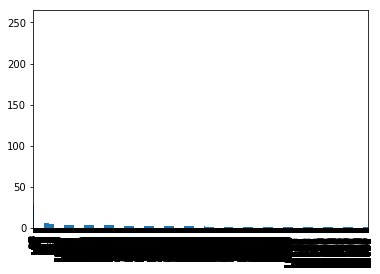

In [14]:
failed_businesses.dba_name.plot.bar()